The point of this notebook is to make a nice looking whisker plot maker script

Along with some test scenarios

based on Esra's script and https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html

In [2]:
from importlib import reload
import fitsio as fio
import numpy as np
import pandas as pd

import copy
import sys
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Make mock data with a constant shear in different directions

In [103]:
canvas_size = 1000
padding = 40
catalog = pd.DataFrame()


x = np.linspace(padding, canvas_size - padding, 10) - canvas_size / 2
y = np.linspace(padding, canvas_size - padding, 10) - canvas_size / 2
xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

catalog["X"] = xx
catalog["Y"] = yy
catalog["E1"] = 1.
catalog["E2"] = 0.

Text(0, 0.5, 'Y')

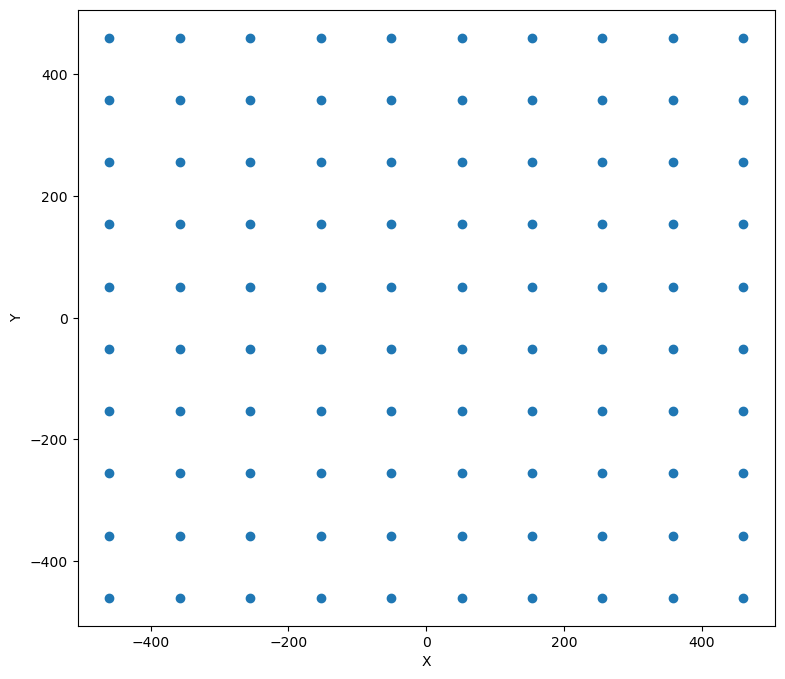

In [104]:
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
ax.scatter(catalog["X"], catalog["Y"])
ax.set_xlabel("X")
ax.set_ylabel("Y")

##  Figure from ESRA

In [105]:
# import matplotlib.pyplot as plt
# import numpy as np
# X = tab['X_IMAGE']
# Y = tab['Y_IMAGE']
# #X, Y = np.meshgrid(X,Y)
# C = cat['MAG_AUTO'][:1000]
# U = 1e2*e1 ##spinor
# V = 1e2*e2

# #fig, ax = plt.subplots()
# fig, ax = plt.subplots(figsize = (10, 10))
# plot=ax.quiver(X, Y, U, V, C, headlength=0, headwidth=0,headaxislength=0, angles='xy',scale=1, scale_units='xy', cmap='cool')
# #ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
# ax.set_xlabel('x [pix]')
# ax.set_ylabel('y [pix]')
# ax.set_title('PSF Pattern with magnitudes')
# fig.colorbar(plot, ax=ax)
# #fig.savefig('e1e2_whisker_v01.png')


Text(0.5, 1.0, 'Ellipticity with magnitudes, E1 = 1, E2 = 0')

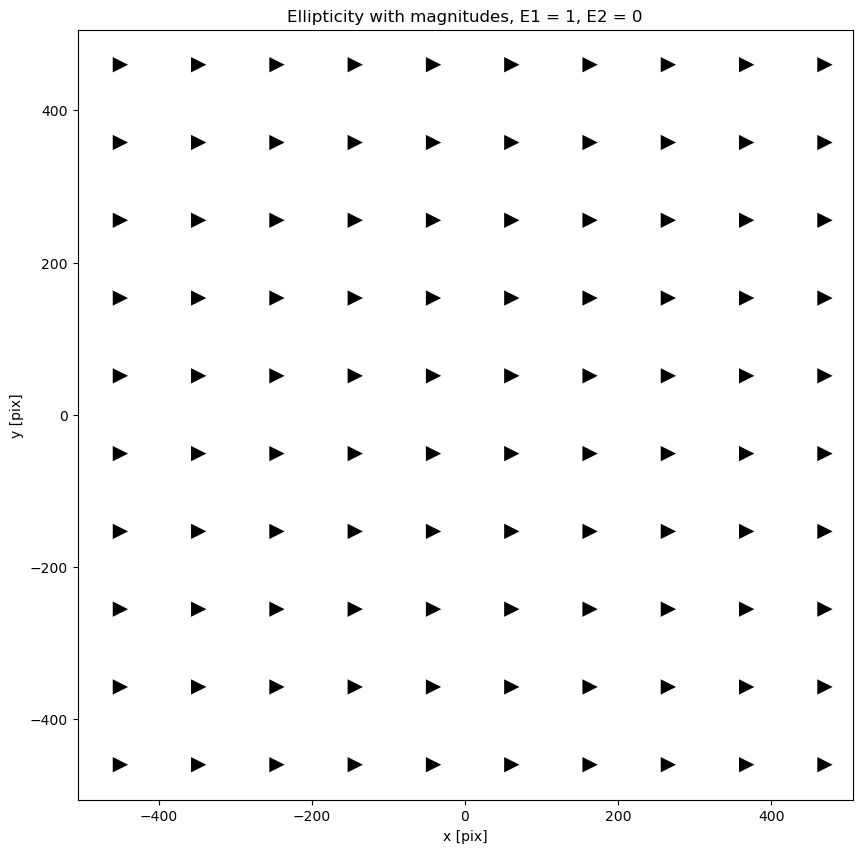

In [106]:
# Slightly modified figure

X = catalog['X']
Y = catalog['Y']
#X, Y = np.meshgrid(X,Y)
C = "black"
U = 20 *catalog['E1']  ##spinor
V = 20 * catalog["E2"]

fig, ax = plt.subplots(figsize = (10, 10))

plot = ax.quiver(X, Y, U, V,
                 headlength=5, headwidth=5,headaxislength=5, angles='uv',scale=1, scale_units='xy')

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')
ax.set_title('Ellipticity with magnitudes, E1 = 1, E2 = 0')


In [107]:
angle

array([45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45.,
       45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45., 45

0.0


Text(0.5, 1.0, 'Ellipticity with magnitudes')

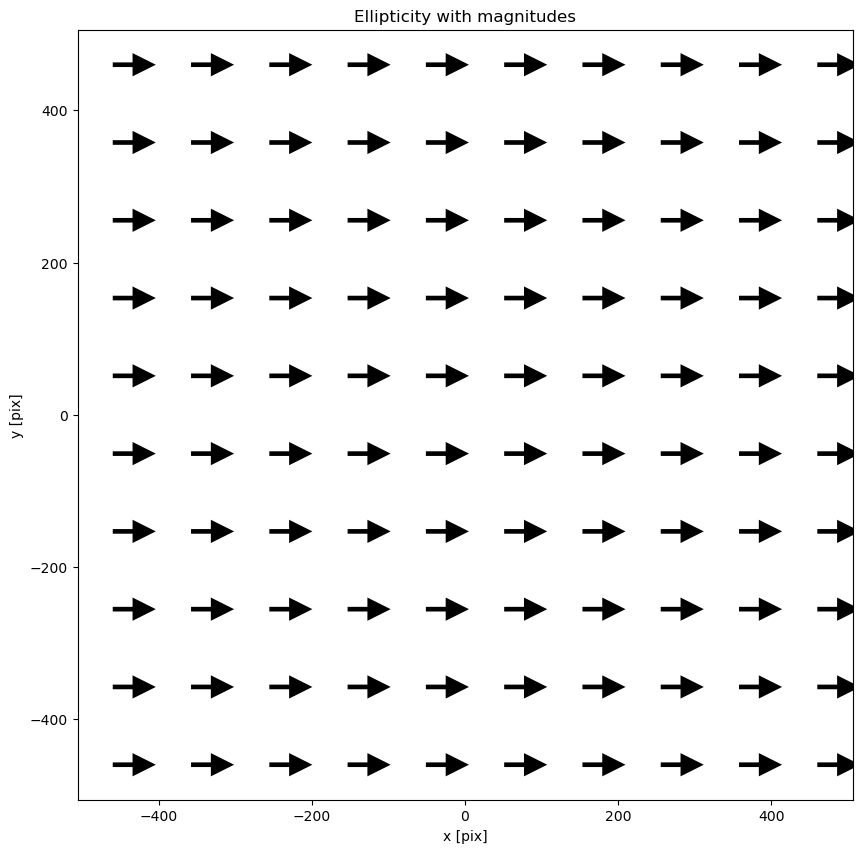

In [108]:
# Slightly modified figure

X = catalog['X']
Y = catalog['Y']
#X, Y = np.meshgrid(X,Y)
C = "black"

# e1 = catalog['E1']
# e2 = catalog['E2']
e1 = np.ones(len(catalog)) * 0
e2 = np.ones(len(catalog)) + 1
U = 20 * (e1)  ##spinor
V = 20 * (e2)

angle = 2 * np.arctan2(e1, e2) * 180 / np.pi
print(angle.mean())

fig, ax = plt.subplots(figsize = (10, 10))

# matplotlib uses degrees, and not radians, and the rotation is counter clockwise
plot = ax.quiver(X, Y, U, V,
                 headlength=5, headwidth=5, headaxislength=5, angles=angle)

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')
ax.set_title('Ellipticity with magnitudes')

In [116]:
def e1e2_to_angle(e1, e2):
    """calculates the arrow direction for plotting in polar"""
    angle = (90 -  np.arctan2(e1, e2) * 180 / np.pi) / 2 + 90.
    return angle

    

90.0
135.0
180.0
45.0


Text(0.5, 1.0, 'E1 = 0, E2 = -1')

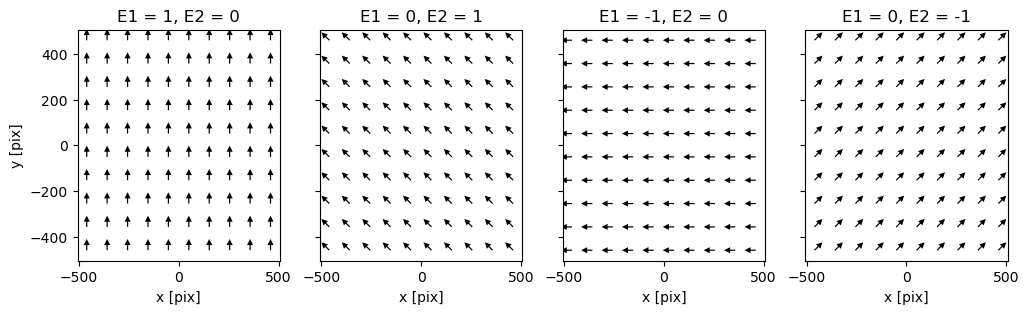

In [117]:
fig, axarr = plt.subplots(ncols=4, figsize = (12, 3), sharex=True, sharey=True)



X = catalog['X']
Y = catalog['Y']
#X, Y = np.meshgrid(X,Y)
C = "black"

# left panel
ax = axarr[0]


e1 = np.ones(len(catalog))
e2 = np.ones(len(catalog)) * 0
U = 20 * (e1)  ##spinor
V = 20 * (e2)

angle = e1e2_to_angle(e1, e2)
print(angle.mean())


# matplotlib uses degrees, and not radians, and the rotation is counter clockwise
plot = ax.quiver(X, Y, U, V,
                 headlength=5, headwidth=5, headaxislength=5, angles=angle)

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')
ax.set_title('E1 = 1, E2 = 0')

# right panel
ax = axarr[1]


e1 = np.ones(len(catalog)) * 0
e2 = np.ones(len(catalog))
U = 20 * (e1)  ##spinor
V = 20 * (e2)

angle = e1e2_to_angle(e1, e2)
print(angle.mean())


# matplotlib uses degrees, and not radians, and the rotation is counter clockwise
plot = ax.quiver(X, Y, U, V,
                 headlength=5, headwidth=5, headaxislength=5, angles=angle)

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
# ax.set_ylabel('y [pix]')
ax.set_title('E1 = 0, E2 = 1')

# right panel
ax = axarr[2]


e1 = np.ones(len(catalog)) * -1
e2 = np.ones(len(catalog)) * 0
U = 20 * (e1)  ##spinor
V = 20 * (e2)

angle = e1e2_to_angle(e1, e2)
print(angle.mean())


# matplotlib uses degrees, and not radians, and the rotation is counter clockwise
plot = ax.quiver(X, Y, U, V,
                 headlength=5, headwidth=5, headaxislength=5, angles=angle)

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
# ax.set_ylabel('y [pix]')
ax.set_title('E1 = -1, E2 = 0')

# right panel
ax = axarr[3]


e1 = np.ones(len(catalog)) * 0
e2 = np.ones(len(catalog)) * -1
U = 20 * (e1)  ##spinor
V = 20 * (e2)

angle = e1e2_to_angle(e1, e2)
print(angle.mean())


# matplotlib uses degrees, and not radians, and the rotation is counter clockwise
plot = ax.quiver(X, Y, U, V,
                 headlength=5, headwidth=5, headaxislength=5, angles=angle)

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
# ax.set_ylabel('y [pix]')
ax.set_title('E1 = 0, E2 = -1')



E1 should point up, and E2 should point 45 deg to the clockwise direction

## Making a isothermal shear profile

In [118]:
canvas_size = 1000
padding = 40
catalog = pd.DataFrame()


x = np.linspace(padding, canvas_size - padding, 20) - canvas_size / 2
y = np.linspace(padding, canvas_size - padding, 20) - canvas_size / 2
xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

catalog["X"] = xx
catalog["Y"] = yy
catalog["E1"] = 1.
catalog["E2"] = 0.

In [141]:
dists = np.sqrt(catalog["X"]**2 + catalog["Y"]**2)
shears = np.sqrt(1 / dists  / 200) # just for illustration purposes
phis =  np.arctan2(catalog["X"], catalog["Y"])
es1 = (-1. * shears * np.cos(2 * phis))
es2 = (-1. * shears * np.sin(2 * phis))

In [155]:
def e1e2_to_angle(e1, e2):
    """calculates the arrow direction for plotting in polar"""
    angle = (90 -  np.arctan2(e1, e2) * 180 / np.pi) / 2 + 90.
    return angle * np.pi / 180.

2.3404865269243973


Text(0.5, 1.0, 'Ellipticity with magnitudes')

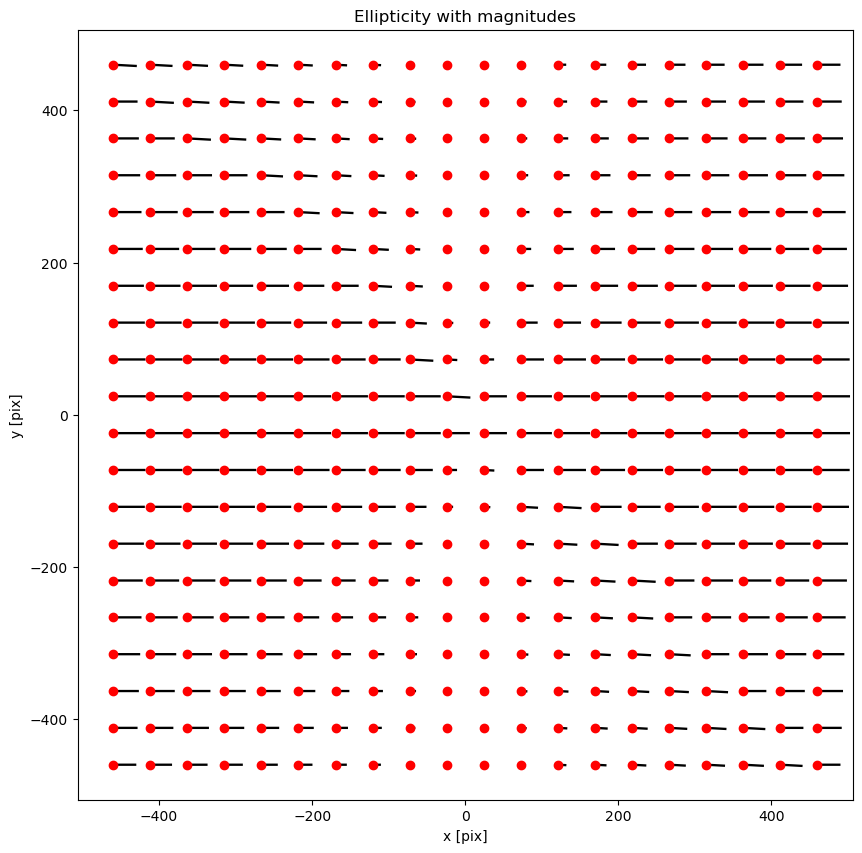

In [156]:
# Slightly modified figure

X = catalog['X']
Y = catalog['Y']
#X, Y = np.meshgrid(X,Y)
C = "black"

# e1 = catalog['E1']
# e2 = catalog['E2']

lens = np.sqrt(es1)
angle = e1e2_to_angle(es1, es2)
U =  np.sin(angle)

print(angle.mean())

fig, ax = plt.subplots(figsize = (10, 10))

# matplotlib uses degrees, and not radians, and the rotation is counter clockwise
ax.quiver(X - U / 2., Y - V / 2., U, V,
                 headlength=0, headwidth=0, headaxislength=0, angles=angle, scale_units="xy" )
ax.scatter(X, Y, color="red")

#ax.quiverkey(q, X=0.2, Y=0.839, U=100,label='Quiver key, length = ??', labelpos='W',coordinates='figure')
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')
ax.set_title('Ellipticity with magnitudes')